# Distribuição Normal

## Definição

Uma variável aleatória contínua $X$ tem distribuição Normal se sua função densidade de probabilidade é dada por: 

$$
    f(x) = \frac{1}{\sqrt{2\pi\sigma²}}\exp{\left[-\frac{1}{2}\left( \frac{x-\mu}{\sigma}\right)^2\right]} , x \in (-\infty, + \infty)
$$

Utilizamos a notação $ X \sim N(\mu, \sigma ^2)$

## Distribuição Normal Padronizada

Distribuição normal com $\mu=0$ e $\sigma = 1$. Desse modo a função de densidade de probabildida é na forma:
$$
    f(x) = \frac{\exp(-x^2/2)}{\sqrt{2\pi}} , x \in (-\infty, + \infty)
$$



A transformação adequada de uma variável x com ditruibção normal com média $\mu$ e desvio padrão $\sigma$ para um variável aleatória com distribuição de probabilidade normal padronizada é dada pela transformação:

$$
    Z = \frac{x-\mu}{\sigma}
$$

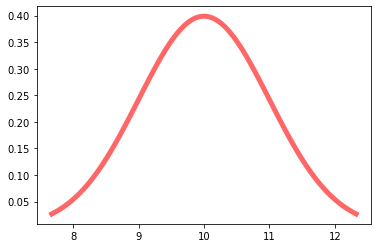

In [3]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

avg = 10
stddev = 1

rv = norm(loc=avg, scale=stddev)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
plt.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6)

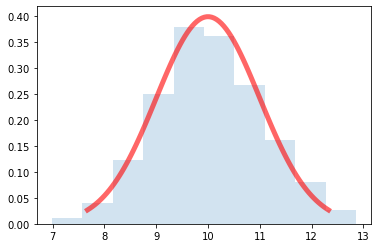

In [7]:
#Generating random numbers

r = rv.rvs(size=1000)
plt.hist(r, density=True, histtype='stepfilled', alpha=0.2)
plt.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6)

### Exemplo prático
Suponha que a espessura média de arruelas produzidas tenha uma distribuição normal com média $11,15$mm e desvio padrão $2,238$mm. Qual a porcentagem de arruelas que tem espessura entre $8,70$mm e $14,70$mm?

In [37]:
avg = 11.15
stddev = 2.238

LI = 8.70
LS = 14.70

rv = norm(loc=avg, scale=stddev)
p_LI = rv.cdf(LI)
p_LS = 1 - rv.cdf(LS)
p = 1 - p_LI - p_LS

#100% numbers for priting
P_LI = 100*p_LI
P_LS = 100*p_LS
P=100*p

print(str("%.2f"% P)+"%")

80.68%


Text(17.864, 0.03618697487479093, '5.63%')

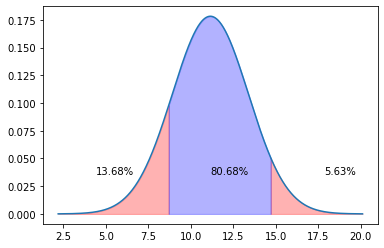

In [41]:
n = 1000 # Size of samples

x = np.linspace(avg-4*stddev, avg+4*stddev,n) #Full range of calculation
x_lower = np.linspace(avg-4*stddev, LI, n) #Range out of spec lower limit
x_upper = np.linspace(LS, avg+4*stddev,n) #Range out of spec upper limit
x_correct = np.linspace(LS,LI,n) # Range under spec

plt.plot(x,rv.pdf(x))

plt.fill_between(x_lower, rv.pdf(x_lower), color='r', alpha=0.3)
plt.fill_between(x_upper, rv.pdf(x_upper), color='r', alpha=0.3)
plt.fill_between(x_correct, rv.pdf(x_correct), color='b', alpha=0.3)

plt.text(avg-3*stddev, 1.5*rv.pdf(avg-2*stddev), str("%.2f"% P_LI)+"%")
plt.text(avg, 1.5*rv.pdf(avg-2*stddev), str("%.2f"% P)+"%")
plt.text(avg+3*stddev, 1.5*rv.pdf(avg-2*stddev), str("%.2f"% P_LS)+"%")